# Support Vector Clustering 
#### Journal of Machine Learning Research 2 (2001) 125-137

##### Impostazioni iperparametri

In [1]:
#iperparametro del kernel gaussiano
q = 0.5
#iperparametro che definisce quanto gli outliers sono tollerati
C = 100
#valore di taglio, quando minore di questo valore imposto beta a 0
cut = 10**-8

## Matrice di dispersione dei tre tipi di iris

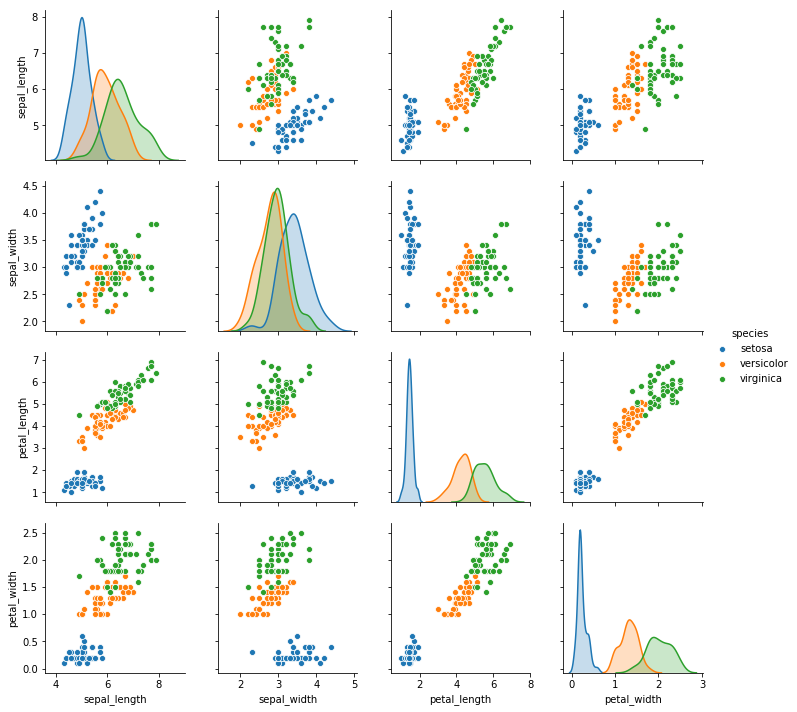

In [3]:
import seaborn as sns
sns.pairplot(sns.load_dataset("iris"), hue="species")

## Importo i dati: libreria sklearn

In [4]:
#xs matrice che contiene i dati, result contiene gli obiettivi ed n la sua grandezza
import sklearn.datasets as ds
iris = ds.load_iris()
xs,result=iris.data,iris.target
n=len(xs)

print(xs)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Implementazione funzione kernel Gaussiano (RBF)
![Kernel.png](img/Kernel.png)

In [5]:
import numpy as np
def gaussian_kernel(q):
    return lambda x1,x2: np.exp(np.multiply(-q,np.linalg.norm(np.subtract(x1,x2))**2))
k=gaussian_kernel(q)
print('Creata funzione kernel k(x1,x2)')

Creata funzione kernel k(x1,x2)


## Matrice NxN della funzione kernel applicata a tutte le coppie di dati

In [6]:
km=np.zeros([n,n])
for i in range(n):
    for j in range(n):
        km[i][j]=k(xs[i],xs[j])
print('Creata kernel matrix km[i][j]')
km

Creata kernel matrix km[i][j]


array([[1.00000000e+00, 8.65022293e-01, 8.78095431e-01, ...,
        4.79668697e-05, 2.00957944e-05, 1.89712650e-04],
       [8.65022293e-01, 1.00000000e+00, 9.55997482e-01, ...,
        4.02661255e-05, 1.46656872e-05, 1.79560205e-04],
       [8.78095431e-01, 9.55997482e-01, 1.00000000e+00, ...,
        1.91157109e-05, 7.84997666e-06, 9.70775902e-05],
       ...,
       [4.79668697e-05, 4.02661255e-05, 1.91157109e-05, ...,
        1.00000000e+00, 8.26959134e-01, 8.14647316e-01],
       [2.00957944e-05, 1.46656872e-05, 7.84997666e-06, ...,
        8.26959134e-01, 1.00000000e+00, 7.44531587e-01],
       [1.89712650e-04, 1.79560205e-04, 9.70775902e-05, ...,
        8.14647316e-01, 7.44531587e-01, 1.00000000e+00]])

## Ottimizzazione beta tramite Gurobipy

In [7]:
lower_bound = 0.
upper_bound = C

#from gurobipy import *
import gurobipy as gb
m = gb.Model('Ottimizzazione')
beta = m.addVars(n, lb= lower_bound, ub= upper_bound, vtype= gb.GRB.CONTINUOUS, name= 'beta')
m.addConstr(beta.sum() == 1)
expr = 0
for i in range(n):
    expr += beta[i] * km[i][i]
for i in range(n):
    for j in range(n):
        expr -= beta[i] * beta[j] * km[i][j]      
m.setObjective(expr, gb.GRB.MAXIMIZE)
m.update()
m.optimize()

Academic license - for non-commercial use only
Optimize a model with 1 rows, 150 columns and 150 nonzeros
Model has 11325 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  QObjective range [5e-11, 4e+00]
  Bounds range     [1e+02, 1e+02]
  RHS range        [1e+00, 1e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve time: 0.02s
Presolved: 1 rows, 150 columns, 150 nonzeros
Presolved model has 11325 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 148
 AA' NZ     : 1.103e+04
 Factor NZ  : 1.118e+04
 Factor Ops : 1.114e+06 (less than 1 second per iteration)
 Threads    : 2

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.51215059e+06  1.47847553e+05  3.51e+04 1.88e+00  2.50e+05     0s
   1  -2.65334324e+05  4.04412678e+05  2.93e+03 

## Approssimo i beta a 0 se minori della variabile cut

In [8]:
for i in range(n):
    if (beta[i].x <= cut):
        beta[i]=0
    else:
        beta[i]=beta[i].x
beta

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0.021143875462212684,
 14: 0.030061926178768055,
 15: 0.11201392085579871,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0.04881027734600652,
 23: 0,
 24: 0.003362753474446862,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0.10912892106739891,
 42: 0,
 43: 0,
 44: 2.9466193906872403e-08,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0.09033336457899757,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0.04887649788549268,
 61: 0,
 62: 0.04562824592669955,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0.008342347017917456,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0.06176788633579

## Implementazione della seguente funzione r2
![/img/R2.png](img/R2.png)

In [9]:
bbk = sum([beta[i] * beta[j] * km[i][j] for i in range(n) for j in range(n)])

r2 = lambda x : k(x,x) - 2 * np.dot([beta[j] for j in range(n)], [k(xs[j],x) for j in range(n)]) + bbk

## Calcolo matrice NxN di r2 per tutti dati contenuti in xs

In [10]:
r2_matrix = [r2(xs[i]) for i in range(n)]
r2_matrix

[0.7886403902206353,
 0.7905034078496416,
 0.7914371116663788,
 0.7983417787252063,
 0.7906585822537995,
 0.8083752503904744,
 0.8045448996796258,
 0.7903963346257392,
 0.8091954505083008,
 0.7972763189298714,
 0.7990047097498211,
 0.8014809595719852,
 0.795212834698289,
 0.8331169790600385,
 0.8331169851136538,
 0.8331169813614061,
 0.7955795257022376,
 0.785840185484737,
 0.8284758624507333,
 0.7941662857921381,
 0.820237609394988,
 0.7915128218794821,
 0.8331169862274335,
 0.8028845289432439,
 0.8331169845025166,
 0.8004299833831536,
 0.792512453023489,
 0.7934203942206592,
 0.7931814451308525,
 0.8004773100610395,
 0.7955557447682016,
 0.8061188035975334,
 0.8160901787244673,
 0.8110075367241246,
 0.7905293895093237,
 0.793451070918366,
 0.8139422859563651,
 0.8005080557351265,
 0.8099908759180783,
 0.7916063371724865,
 0.786382261323334,
 0.8331169723997022,
 0.8167200255444877,
 0.8049030468170577,
 0.8313885326628374,
 0.7860698694480412,
 0.8030357145485261,
 0.7977948869411589

## Trovo gli indici dei support vector e dei bounded support vector

In [11]:
#I SVs sono i punti che risiedono sulla superficie dell'ipersfera
svs = [i for i in range(n) if beta[i] < C]
#I BSVs sono i punti che risiedono al di fuori dell'ipersfera
bsvs = [i for i in range(n) if beta[i] >= C]
print("svs:", end=" ")
print(svs)
print('')
print("bsvs:", end=" ")
print(bsvs)

svs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]

bsvs: []


## Trovo la media dei SVS

In [12]:
#Raggio dell'ipersfera
radius = np.array([r2_matrix[i] for i in svs]).mean()
print ("Il SV medio è:", end=" ")
print (radius)

Il SV medio è: 0.7976471462287691


## Trovo se tutti i punti nella distanza tra i punti x1 e x2 sono tutti contenuti nella sfera

In [13]:
def segment(x1,x2,radius,n=10):   
    for i in range(n):
        x = x1+(x2-x1)*i/(n-1)
        if r2(x)>radius:
            return False
    return True

## Creo matrice per dire se due punti appartengo a stesso cluster

In [14]:
inside = np.zeros((n,n))
for i in range(n):
    print(i)
    if i not in bsvs:
        for j in range(i,n):
            if j not in bsvs:
                inside[i,j]=inside[j,i]=segment(xs[i],xs[j],radius)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


## Creo lista di risultati predetti

In [15]:
#Array contenente il cluster predetto per ogni punto dato in partenza
ids = list(range(n))
clusters = {}
num_clusters = 0
while ids:
    num_clusters+=1
    clusters[num_clusters]=[]
    curr_id = ids.pop(0)
    queue = [curr_id]
    while queue:
        cid = queue.pop(0)
        for i in ids:
            if inside[i,cid]:
                queue.append(i)
                ids.remove(i)
        clusters[num_clusters].append(cid)

labels = np.zeros(n)
for i in clusters.keys():
    for j in clusters[i]:
        labels[j] = i
labels=labels.astype(int)
labels

array([ 1,  1,  1,  2,  1,  3,  4,  1,  5,  1,  6,  7,  1,  8,  9, 10,  1,
        1, 11,  1, 12,  1, 13, 14, 15, 16,  1,  1,  1, 17,  1, 18, 19, 20,
        1,  1, 21, 22, 23,  1,  1, 24, 25, 26, 27,  1, 28, 29,  1,  1, 30,
       31, 32, 33, 33, 33, 33, 34, 35, 33, 36, 33, 37, 33, 38, 39, 33, 40,
       41, 33, 33, 42, 33, 33, 43, 44, 45, 33, 33, 46, 33, 33, 33, 33, 47,
       48, 33, 49, 50, 33, 33, 33, 33, 51, 33, 52, 33, 33, 53, 33, 54, 33,
       33, 33, 33, 33, 55, 33, 56, 57, 33, 33, 33, 58, 59, 33, 33, 60, 61,
       62, 33, 33, 63, 33, 33, 33, 33, 33, 33, 33, 33, 64, 33, 33, 65, 33,
       66, 33, 33, 33, 33, 67, 33, 33, 68, 69, 33, 33, 70, 33])

# Creo la PCA a 2 dimensioni del mio dataset per rappresentare meglio il grafico

In [16]:
#La principal component analysis Lo scopo della tecnica è quello di ridurre il numero più o meno 
#elevato di variabili che descrivono un insieme di dati ad un numero minore di variabili latenti, 
#limitando il più possibile la perdita di informazioni.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
xs_pca=pca.fit_transform(xs)
xs_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

## Disegno i punti in base ai cluster predetti

<function matplotlib.pyplot.show(*args, **kw)>

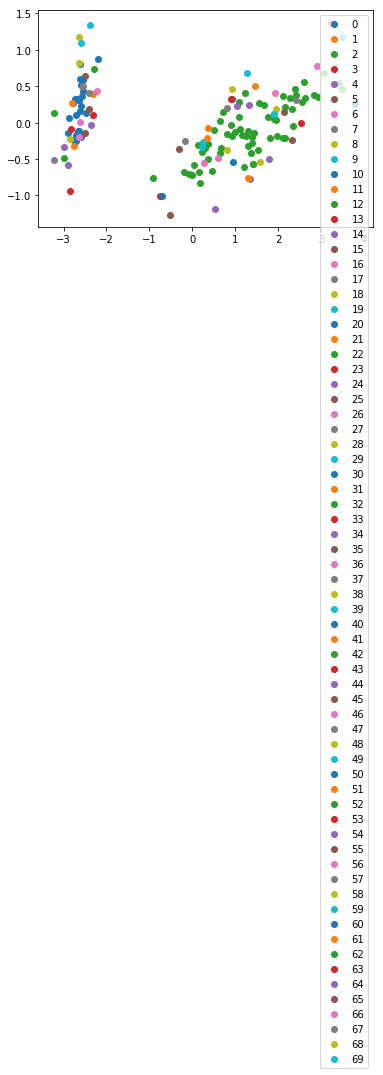

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

for c in range(num_clusters):
    x_cluster = [x for x, l in zip(xs_pca, labels) if l==c+1]
    plt.scatter(*np.array(x_cluster).T , label = c)
plt.legend()
plt.show

## Disegno i punti con i cluster reali

<function matplotlib.pyplot.show(*args, **kw)>

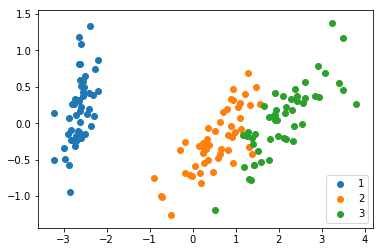

In [18]:
for c in range(result.max()+1):
    x_cluster = [x for x, l in zip(xs_pca, result) if l==c]
    plt.scatter(*np.array(x_cluster).T , label = c+1)
plt.legend()
plt.show